# Loan Prediction

# Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

##### Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import imblearn

In [2]:
import os
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.formula.api as sm
import seaborn as sns

C:\Users\HOME\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\HOME\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HOME\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\HOME\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\HOME\Anac

In [3]:
lp_train=pd.read_csv(r'C:\\Users\\HOME\\Desktop\\train_loanpred.csv')
lp_test=pd.read_csv(r'C:\\Users\\HOME\\Desktop\\test_loanpred.csv')

In [4]:
lp_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(lp_train.shape[0], lp_train.shape[1]))

Train set dimension: 614 rows, 13 columns


In [6]:
# View test data
lp_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [7]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(lp_test.shape[0], lp_test.shape[1]))

Test set dimension: 367 rows, 12 columns


In [8]:
lp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
lp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
# segregating numeric and categorical variables
numeric_var_names=[key for key in dict(lp_train.dtypes) if dict(lp_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(lp_train.dtypes) if dict(lp_train.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
numeric_var_name=[key for key in dict(lp_test.dtypes) if dict(lp_test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_name=[key for key in dict(lp_test.dtypes) if dict(lp_test.dtypes)[key] in ['object']]
print (numeric_var_name)
print (cat_var_name)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [12]:
lp_num=lp_train[numeric_var_names]
lp_num.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [13]:
lp_numt = lp_test[cat_var_name]
lp_numt.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [14]:
lp_cat = lp_train[cat_var_names]
lp_cat.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [15]:
lp_catt = lp_test[cat_var_name]
lp_catt.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=lp_num.apply(lambda x: var_summary(x)).T

In [17]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ApplicantIncome,614.0,0.0,3.317724e+06,5403.459283,3812.5,6109.041673,3.732039e+07,150.0,1025.0,1897.55,2216.1,2877.5,3812.5,5795.00,9459.9,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,0.0,9.954449e+05,1621.245798,1188.5,2926.248369,8.562930e+06,0.0,0.0,0.00,0.0,0.0,1188.5,2297.25,3782.2,4997.4,8895.89,41667.0
LoanAmount,592.0,22.0,8.667600e+04,146.412162,128.0,85.587325,7.325190e+03,9.0,30.0,56.00,71.0,100.0,128.0,168.00,235.8,297.8,496.36,700.0
Loan_Amount_Term,600.0,14.0,2.052000e+05,342.000000,360.0,65.120410,4.240668e+03,12.0,84.0,180.00,294.0,360.0,360.0,360.00,360.0,360.0,480.00,480.0
Credit_History,564.0,50.0,4.750000e+02,0.842199,1.0,0.364878,1.331362e-01,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0


In [18]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(lp_train)

Number of variables,13
Number of observations,614
Total Missing (%),1.9%
Total size in memory,62.4 KiB
Average record size in memory,104.1 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [19]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
#     col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [20]:
lp_train.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True)

In [21]:
# creating dummies for categorical variables
for c_feature in ['Gender', 'Married','Education','Self_Employed','Property_Area']:
    lp_train[c_feature] = lp_train[c_feature].astype('category') #way to convert column into category
    lp_cat = create_dummies(lp_cat , c_feature )

In [22]:
lp_cat.head()

,Loan_ID,Dependents,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,Y,0,1,1,0,1,0,1,0,0,0,1


In [23]:
lp_cat.sort_values(by=['Loan_ID'], ascending=[True],inplace=True)

In [24]:
lp_train.sort_values(by=['Loan_ID'], ascending=[True],inplace=True)

In [25]:
# Setting 'Loan_Id' as index of the Dataframe 
lp_cat.set_index('Loan_ID',inplace=True)

In [26]:
# Setting 'Loan_Id' as index of the Dataframe 
lp_train.set_index('Loan_ID',inplace=True)

In [27]:
lp_cat.drop('Loan_Status',inplace=True,axis=1)

In [28]:
lp1=pd.concat([lp_cat,lp_train],axis=1)

In [29]:
lp1.head()

,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,
LP001002,0,0,1,1,0,1,0,1,0,0,0,1,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,1,0,1,0,1,1,0,1,0,1,0,0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,0,0,1,0,1,1,0,0,1,0,0,1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,0,0,1,0,1,0,1,1,0,0,0,1,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,0,0,1,1,0,1,0,1,0,0,0,1,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [30]:
# Dropping the original variables from which dummies were built 
lp1.drop(['Gender','Married','Education','Self_Employed','Property_Area'],inplace=True,axis=1)

In [31]:
lp1.head()

,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,
LP001002,0,0,1,1,0,1,0,1,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,1
LP001003,1,0,1,0,1,1,0,1,0,1,0,0,1,4583,1508.0,128.0,360.0,1.0,0
LP001005,0,0,1,0,1,1,0,0,1,0,0,1,0,3000,0.0,66.0,360.0,1.0,1
LP001006,0,0,1,0,1,0,1,1,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1
LP001008,0,0,1,1,0,1,0,1,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1


In [32]:
lp1.columns

Index(['Dependents', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [33]:
lp1=lp1.T.drop_duplicates().T

In [34]:
lp1.columns

Index(['Dependents', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [35]:
# creating dummies for categorical variables
for c_feature in ['Gender', 'Married','Education','Self_Employed','Property_Area']:
    lp_test[c_feature] = lp_test[c_feature].astype('category') #way to convert column into category
    lp_catt = create_dummies(lp_catt , c_feature )

In [36]:
lp_catt.head()

,Loan_ID,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,0,1,0,1,1,0,1,0,0,0,1
1,LP001022,1,0,1,0,1,1,0,1,0,0,0,1
2,LP001031,2,0,1,0,1,1,0,1,0,0,0,1
3,LP001035,2,0,1,0,1,1,0,1,0,0,0,1
4,LP001051,0,0,1,1,0,0,1,1,0,0,0,1


In [37]:
lp_catt.sort_values(by=['Loan_ID'], ascending=[True],inplace=True)

In [38]:
lp_test.sort_values(by=['Loan_ID'], ascending=[True],inplace=True)

In [39]:
# Setting 'Loan_Id' as index of the Dataframe 
lp_catt.set_index('Loan_ID',inplace=True)

In [40]:
# Setting 'Loan_Id' as index of the Dataframe 
lp_test.set_index('Loan_ID',inplace=True)

In [41]:
lptest=pd.concat([lp_test,lp_catt],axis=1)

In [42]:
# Dropping the original variables from which dummies were built 
lptest.drop(['Gender','Married','Education','Self_Employed','Property_Area'],inplace=True,axis=1)

In [43]:
lptest.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [44]:
lptest=lptest.T.drop_duplicates().T

In [45]:
lp1.head()

,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0,0,1,1,0,1,0,1,0,0,0,1,5849,0,NaN,360,1,1
LP001003,1,0,1,0,1,1,0,1,0,1,0,0,4583,1508,128,360,1,0
LP001005,0,0,1,0,1,1,0,0,1,0,0,1,3000,0,66,360,1,1
LP001006,0,0,1,0,1,0,1,1,0,0,0,1,2583,2358,120,360,1,1
LP001008,0,0,1,1,0,1,0,1,0,0,0,1,6000,0,141,360,1,1


In [46]:
lp_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
print(lp1.isnull().sum())
print(lptest.isnull().sum())

Dependents                 15
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
dtype: int64
Dependents                 10
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural        

In [48]:
lp1_d=lp1['Dependents']
lp1_dt=lptest['Dependents']

In [49]:
lp1_d=lp1_d.map({'3+':3,'2':2,'1':1,'0':0})
lp1_dt=lp1_dt.map({'3+':3,'2':2,'1':1,'0':0})


In [50]:
lp1_d.fillna(lp1_d.median(), inplace=True)
# count the number of NaN values in each column
print(lp1_d.isnull().sum())

lp1_dt.fillna(lp1_dt.median(), inplace=True)
# count the number of NaN values in each column
print(lp1_dt.isnull().sum())

0
0


In [51]:
lp1_dt.head()

Loan_ID
LP001015    0.0
LP001022    1.0
LP001031    2.0
LP001035    2.0
LP001051    0.0
Name: Dependents, dtype: float64

In [52]:
lp1.drop('Dependents',inplace=True,axis=1)
lptest.drop('Dependents',inplace=True,axis=1)

In [53]:
lp1=pd.concat([lp1,lp1_d],axis=1)
lptest=pd.concat([lptest,lp1_dt],axis=1)

In [54]:
lp1.rename({'Education_Not Graduate':'Education_NotGraduate'},axis=1,inplace=True)
lptest.rename({'Education_Not Graduate':'Education_NotGraduate'},axis=1,inplace=True)

In [55]:
lptest.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_NotGraduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents'],
      dtype='object')

In [56]:
print(lp1.isnull().sum())

Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Education_Graduate          0
Education_NotGraduate       0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Dependents                  0
dtype: int64


In [57]:
numeric_var_names=[key for key in dict(lp1.dtypes) if dict(lp1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(lp1.dtypes) if dict(lp1.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)


['Dependents']
['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate', 'Education_NotGraduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


In [58]:
num_summary=lp1.apply(lambda x: var_summary(x)).T

In [59]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Gender_Female,614.0,0.0,1.120000e+02,0.182410,0.0,0.386497,1.493802e-01,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0,1.0,1.00,1.0
Gender_Male,614.0,0.0,4.890000e+02,0.796417,1.0,0.402991,1.624015e-01,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
Married_No,614.0,0.0,2.130000e+02,0.346906,0.0,0.476373,2.269317e-01,0.0,0.0,0.00,0.0,0.0,0.0,1.00,1.0,1.0,1.00,1.0
Married_Yes,614.0,0.0,3.980000e+02,0.648208,1.0,0.477919,2.284062e-01,0.0,0.0,0.00,0.0,0.0,1.0,1.00,1.0,1.0,1.00,1.0
Education_Graduate,614.0,0.0,4.800000e+02,0.781759,1.0,0.413389,1.708902e-01,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
Education_NotGraduate,614.0,0.0,1.340000e+02,0.218241,0.0,0.413389,1.708902e-01,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0,1.0,1.00,1.0
Self_Employed_No,614.0,0.0,5.000000e+02,0.814332,1.0,0.389155,1.514419e-01,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
Self_Employed_Yes,614.0,0.0,8.200000e+01,0.133550,0.0,0.340446,1.159035e-01,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0,1.0,1.00,1.0
Property_Area_Rural,614.0,0.0,1.790000e+02,0.291531,0.0,0.454838,2.068776e-01,0.0,0.0,0.00,0.0,0.0,0.0,1.00,1.0,1.0,1.00,1.0
Property_Area_Semiurban,614.0,0.0,2.330000e+02,0.379479,0.0,0.485653,2.358588e-01,0.0,0.0,0.00,0.0,0.0,0.0,1.00,1.0,1.0,1.00,1.0


In [60]:
# Clipping outlier 
lp1['ApplicantIncome']=lp1['ApplicantIncome'].clip_upper(lp1['ApplicantIncome'].quantile(0.99)) 
lp1['ApplicantIncome']=lp1['ApplicantIncome'].clip_lower(lp1['ApplicantIncome'].quantile(0.01)) 
lp1['CoapplicantIncome']=lp1['CoapplicantIncome'].clip_upper(lp1['CoapplicantIncome'].quantile(0.99)) 
lp1['CoapplicantIncome']=lp1['CoapplicantIncome'].clip_lower(lp1['CoapplicantIncome'].quantile(0.01)) 
lp1['LoanAmount']=lp1['LoanAmount'].clip_upper(lp1['LoanAmount'].quantile(0.99)) 
lp1['LoanAmount']=lp1['LoanAmount'].clip_lower(lp1['LoanAmount'].quantile(0.01)) 


In [61]:
#Handling missings for train data
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

lp1=lp1.apply(lambda x: Missing_imputation(x))

In [62]:
print(lp1.isnull().sum())

Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_NotGraduate      0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents                 0
dtype: int64


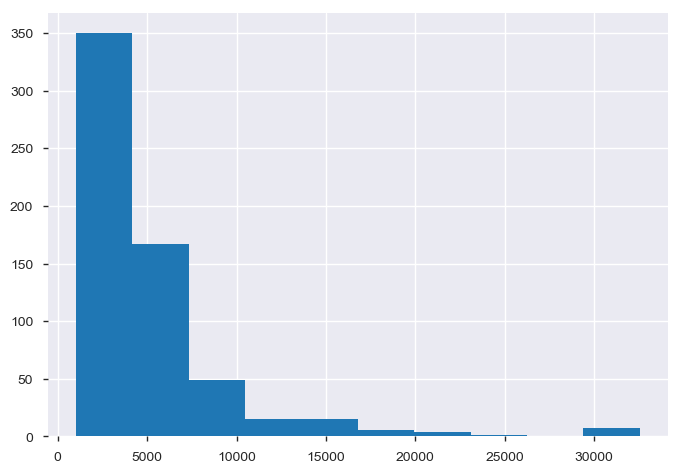

In [63]:
lp1.ApplicantIncome.hist()

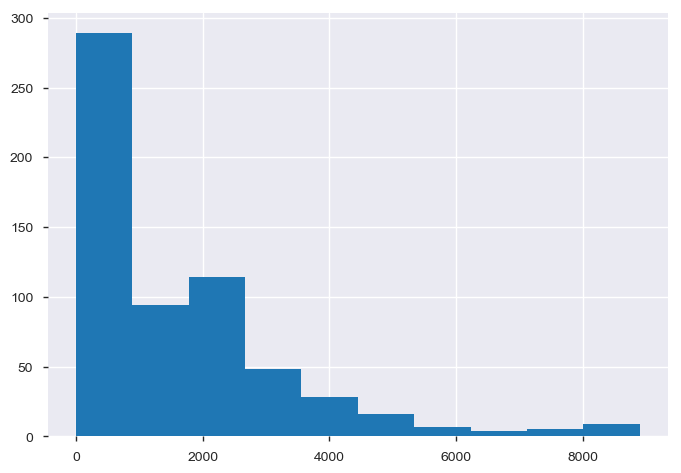

In [64]:
lp1.CoapplicantIncome.hist()

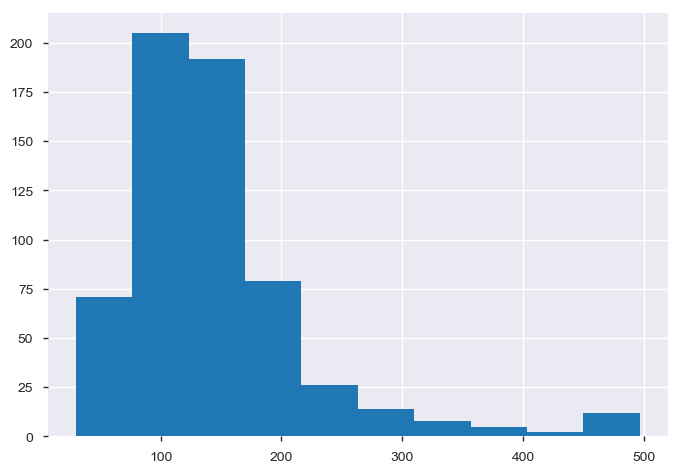

In [65]:
lp1.LoanAmount.hist()

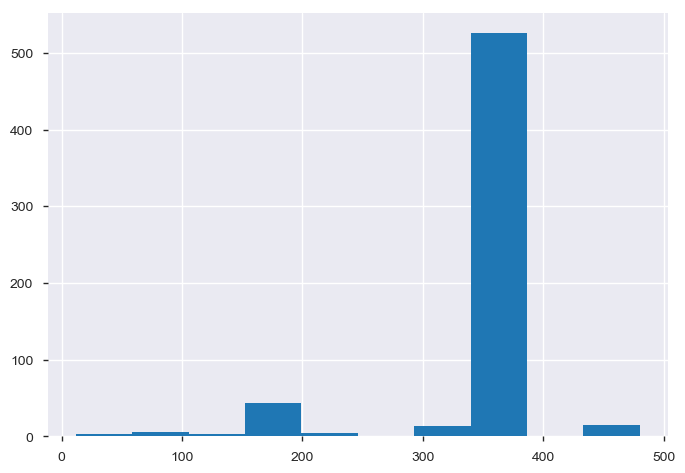

In [80]:
lp1.Loan_Amount_Term.hist()

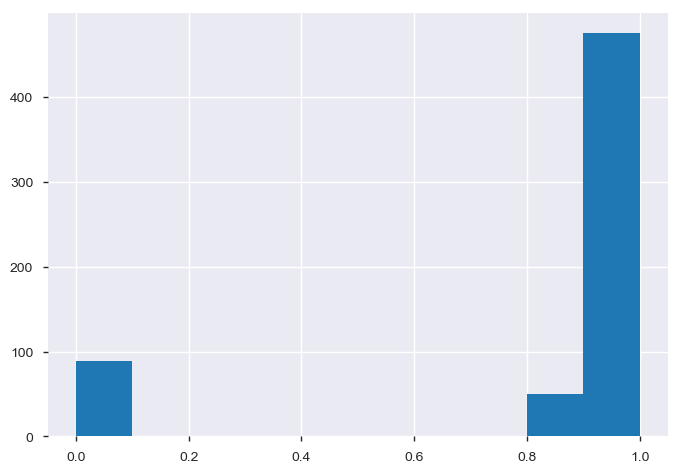

In [81]:
lp1.Credit_History.hist()

In [83]:
# transforming skewed variables

In [84]:
ApplicantIncome_log = np.log(lp1.ApplicantIncome)
ApplicantIncome_log.describe()


count    614.000000
mean       2.119231
std        0.070354
min        1.936213
25%        2.075016
50%        2.109733
75%        2.159263
max        2.340867
Name: ApplicantIncome, dtype: float64

In [85]:
CoapplicantIncome_log = np.log(lp1.CoapplicantIncome+1)
CoapplicantIncome_log.describe()

count    614.000000
mean       1.200381
std        1.076659
min        0.000000
25%        0.000000
50%        2.089529
75%        2.167898
max        2.311887
Name: CoapplicantIncome, dtype: float64

In [86]:
LoanAmount_log = np.log(lp1.LoanAmount)
LoanAmount_log.describe()


count    614.000000
mean       1.576898
std        0.099811
min        1.224128
25%        1.527719
50%        1.581000
75%        1.630108
max        1.825726
Name: LoanAmount, dtype: float64

In [87]:
Loan_Amount_Term_log = np.log(lp1.Loan_Amount_Term)
Loan_Amount_Term_log.describe()

count    614.000000
mean       5.802065
std        0.312482
min        2.484907
25%        5.886104
50%        5.886104
75%        5.886104
max        6.173786
Name: Loan_Amount_Term, dtype: float64

In [88]:
lp1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_NotGraduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,Credit_History,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0,1,1,0,1,0,1,0,0,0,1,360.0,1.0,1,0.0,8.674026,0.000000,4.979551
LP001003,0,1,0,1,1,0,1,0,1,0,0,360.0,1.0,0,1.0,8.430109,7.319202,4.852030
LP001005,0,1,0,1,1,0,0,1,0,0,1,360.0,1.0,1,0.0,8.006368,0.000000,4.189655
LP001006,0,1,0,1,0,1,1,0,0,0,1,360.0,1.0,1,0.0,7.856707,7.765993,4.787492
LP001008,0,1,1,0,1,0,1,0,0,0,1,360.0,1.0,1,0.0,8.699515,0.000000,4.948760


In [89]:
lp1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],inplace=True,axis=1)

In [90]:
lp1=pd.concat([lp1,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log],axis=1)

In [91]:
lp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 18 columns):
Gender_Female              614 non-null int64
Gender_Male                614 non-null int64
Married_No                 614 non-null int64
Married_Yes                614 non-null int64
Education_Graduate         614 non-null int64
Education_NotGraduate      614 non-null int64
Self_Employed_No           614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Rural        614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area_Urban        614 non-null int64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
Dependents                 614 non-null float64
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
dtypes: float64(6), int64(12)
memory usage: 91.1

In [92]:
#Handling missings for test data
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

lptest=lptest.apply(lambda x: Missing_imputation(x))

In [93]:
print(lptest.isnull().sum())

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_NotGraduate      0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Dependents                 0
dtype: int64


In [94]:
lp1.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_NotGraduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Credit_History', 'Loan_Status', 'Dependents',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

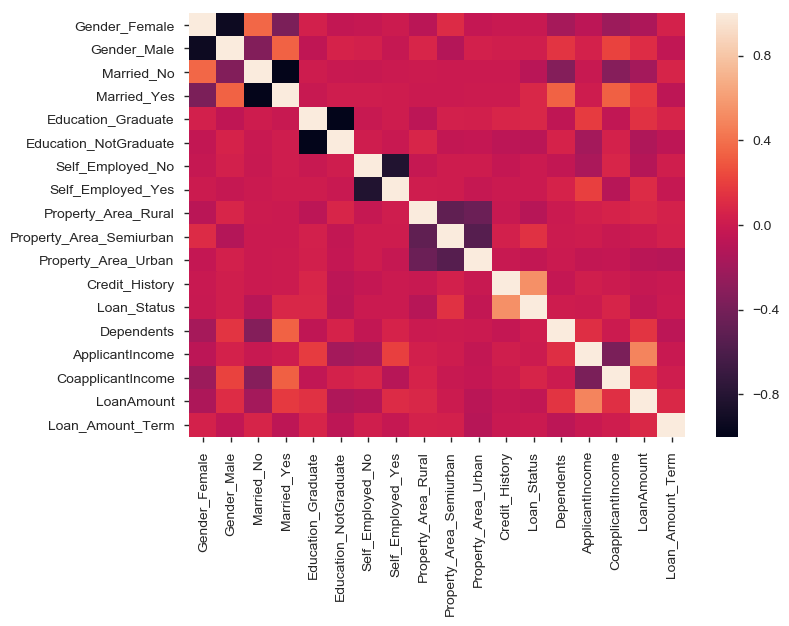

In [109]:
sns.heatmap(lp1.corr()) 

In [110]:
columnsTitles = ['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_NotGraduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Amount_Term', 'Credit_History',
       'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount','Loan_Status']
lp1.reindex(columns=columnsTitles)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_NotGraduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,Credit_History,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0,1,1,0,1,0,1,0,0,0,1,5.886104,1.000000,0.0,2.160333,0.000000,1.605340,1
LP001003,0,1,0,1,1,0,1,0,1,0,0,5.886104,1.000000,1.0,2.131810,2.118566,1.579397,0
LP001005,0,1,0,1,1,0,0,1,0,0,1,5.886104,1.000000,0.0,2.080237,0.000000,1.432618,1
LP001006,0,1,0,1,0,1,1,0,0,0,1,5.886104,1.000000,0.0,2.061368,2.170880,1.566007,1
LP001008,0,1,1,0,1,0,1,0,0,0,1,5.886104,1.000000,0.0,2.163267,0.000000,1.599137,1
LP001011,0,1,0,1,1,0,0,1,0,0,1,5.886104,1.000000,2.0,2.151448,2.234534,1.720487,1
LP001013,0,1,0,1,0,1,1,0,0,0,1,5.886104,1.000000,0.0,2.048326,2.119202,1.515979,1
LP001014,0,1,0,1,1,0,1,0,0,1,0,5.886104,0.000000,3.0,2.081726,2.177707,1.621879,0
LP001018,0,1,0,1,1,0,1,0,0,0,1,5.886104,1.000000,2.0,2.115719,2.119991,1.633928,1


In [111]:
lp1_num= lp1[['Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

In [112]:
lp1_num.head()

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_ID,,,,,
LP001002,5.886104,1.0,2.160333,0.000000,1.605340
LP001003,5.886104,1.0,2.131810,2.118566,1.579397
LP001005,5.886104,1.0,2.080237,0.000000,1.432618
LP001006,5.886104,1.0,2.061368,2.170880,1.566007
LP001008,5.886104,1.0,2.163267,0.000000,1.599137


### Scaling Numerical Variables

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()
lp_scaled=sc.fit_transform(lp1_num)
lp_scaled



array([[ 0.26916097,  0.45164045,  0.58468658, -1.11582198,  0.28518656],
       [ 0.26916097,  0.45164045,  0.17893075,  0.85350455,  0.02505989],
       [ 0.26916097,  0.45164045, -0.55470938, -1.11582198, -1.44670108],
       ...,
       [ 0.26916097,  0.45164045,  1.10340728,  0.62194663,  1.34264906],
       [ 0.26916097,  0.45164045,  1.00424479, -1.11582198,  0.77935557],
       [ 0.26916097, -2.41044061,  0.17893075, -1.11582198,  0.10393745]])

In [115]:
cols = lp1_num.select_dtypes(include=['float64','int64']).columns
lptrain = pd.DataFrame(lp_scaled, index=lp1_num.index, columns = cols)


In [116]:
lptrain.head()

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_ID,,,,,
LP001002,0.269161,0.45164,0.584687,-1.115822,0.285187
LP001003,0.269161,0.45164,0.178931,0.853505,0.025060
LP001005,0.269161,0.45164,-0.554709,-1.115822,-1.446701
LP001006,0.269161,0.45164,-0.823138,0.902133,-0.109208
LP001008,0.269161,0.45164,0.626427,-1.115822,0.222992


In [117]:
lp_cat=lp1[['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_NotGraduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Amount_Term','Dependents']].copy()

In [118]:
lp_train=pd.concat([lptrain,lp_cat],axis=1)

In [119]:
target = lp1[['Loan_Status']].copy()

In [120]:
lp_train.head()

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_NotGraduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,Dependents
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.269161,0.45164,0.584687,-1.115822,0.285187,0,1,1,0,1,0,1,0,0,0,1,5.886104,0.0
LP001003,0.269161,0.45164,0.178931,0.853505,0.025060,0,1,0,1,1,0,1,0,1,0,0,5.886104,1.0
LP001005,0.269161,0.45164,-0.554709,-1.115822,-1.446701,0,1,0,1,1,0,0,1,0,0,1,5.886104,0.0
LP001006,0.269161,0.45164,-0.823138,0.902133,-0.109208,0,1,0,1,0,1,1,0,0,0,1,5.886104,0.0
LP001008,0.269161,0.45164,0.626427,-1.115822,0.222992,0,1,1,0,1,0,1,0,0,0,1,5.886104,0.0


In [121]:
print(lp_train.isnull().sum())

Loan_Amount_Term           0
Credit_History             0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_NotGraduate      0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Amount_Term           0
Dependents                 0
dtype: int64


In [122]:
print(target.isnull().sum())

Loan_Status    0
dtype: int64


#### As seen in profiling report data is imbalanced and require balancing

In [123]:
import imblearn.over_sampling as os

In [124]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
X = lp_train
# reshape target column to 1D array shape  

c, r = target.values.shape
y = target.values.reshape(c,)


# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 422, 0: 422})


In [125]:
#splitting the data
train_features = X.columns
train_X, test_X = train_test_split(X_res, test_size=0.3, random_state=42)
train_y, test_y = train_test_split(y_res, test_size=0.3, random_state=42)



### Feature Selection using Principal Component Analysis Method

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA()
X_train= pca.fit_transform(train_X)
X_test= pca.transform(test_X)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [1.96610765e-01 1.74156753e-01 1.51163188e-01 1.26192275e-01
 9.55118135e-02 5.63249231e-02 4.24531822e-02 3.81442925e-02
 3.42184705e-02 3.26700865e-02 2.50106846e-02 2.40965861e-02
 2.05298916e-03 1.10659413e-03 2.87395904e-04 2.33252516e-29
 4.93215050e-33 4.52553633e-34]


In [128]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

In [129]:
var

array([1.96610765e-01, 1.74156753e-01, 1.51163188e-01, 1.26192275e-01,
       9.55118135e-02, 5.63249231e-02, 4.24531822e-02, 3.81442925e-02,
       3.42184705e-02, 3.26700865e-02, 2.50106846e-02, 2.40965861e-02,
       2.05298916e-03, 1.10659413e-03, 2.87395904e-04, 2.33252516e-29,
       4.93215050e-33, 4.52553633e-34])

In [130]:
var1

array([19.661, 37.077, 52.193, 64.812, 74.363, 79.995, 84.24 , 88.054,
       91.476, 94.743, 97.244, 99.654, 99.859, 99.97 , 99.999, 99.999,
       99.999, 99.999])

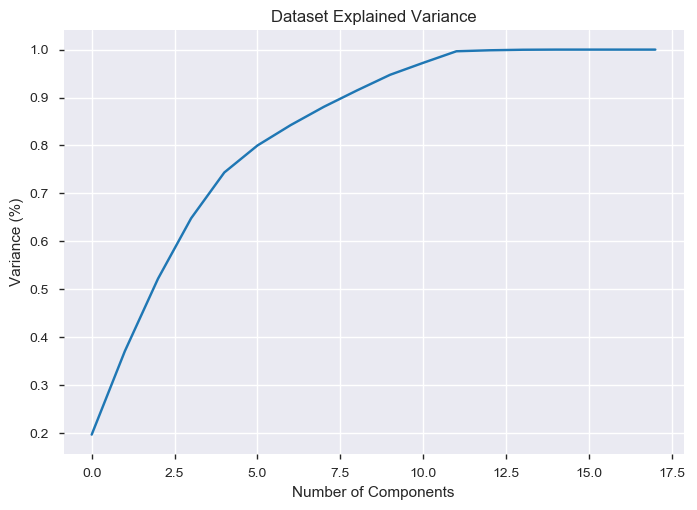

In [131]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [132]:
pca = PCA(n_components=11)
pc_final=pca.fit(train_X)
X_train = pca.fit_transform(train_X)
X_test= pca.transform(test_X)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.19661077 0.17415675 0.15116319 0.12619227 0.09551181 0.05632492
 0.04245318 0.03814429 0.03421847 0.03267009 0.02501068]


In [133]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.301734,-0.579660,0.764950,-0.933309,0.310692,-0.659829,-0.776800,0.445679,-0.036403,0.080674,-0.053132
1,-0.331894,0.929886,2.090209,-0.420109,-0.709727,1.287606,-0.101822,-0.706627,-0.512258,-0.381977,0.476923
2,-1.178433,-0.875908,0.881440,-0.835264,0.012544,0.213722,-0.961600,0.614268,-0.096398,0.032241,0.770272
3,-0.159763,0.054995,1.267094,-0.649759,-0.249505,-0.152546,-0.700780,0.506925,-0.080662,-0.018572,-0.190050
4,-2.193803,0.070885,-1.938373,0.544520,-0.375989,-0.867879,-0.586762,-0.789693,-0.651550,-0.820538,-0.097645


### Prediction Function

In [134]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the true positive and false positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

### Models built to check which model fits without optimization

## Random Forest

In [135]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train,train_y)

#Model Score on Valdation Data Set
pred(rf_model,X_test,test_y)


CONFUSION MATRIX ------->> 
col_0    0    1
row_0          
0      115   21
1       15  103

Classification paradox :------->>
Accuracy :-  85.83

Specificity //  True Negative Rate :-  84.56

Sensivity // True Positive Rate // Recall :-  87.29

False Negative Rate :-  12.71

False Postive Rate :-  15.44

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       136
           1       0.83      0.87      0.85       118

    accuracy                           0.86       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.86      0.86      0.86       254



## Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train,train_y)

#Model Score on Valdation Data Set
pred(logit_model,X_test,test_y)


CONFUSION MATRIX ------->> 
col_0   0    1
row_0         
0      75   61
1      15  103

Classification paradox :------->>
Accuracy :-  70.08

Specificity //  True Negative Rate :-  55.15

Sensivity // True Positive Rate // Recall :-  87.29

False Negative Rate :-  12.71

False Postive Rate :-  44.85

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       136
           1       0.63      0.87      0.73       118

    accuracy                           0.70       254
   macro avg       0.73      0.71      0.70       254
weighted avg       0.74      0.70      0.69       254



## KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train,train_y)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,test_y)


CONFUSION MATRIX ------->> 
col_0   0   1
row_0        
0      97  39
1      30  88

Classification paradox :------->>
Accuracy :-  72.83

Specificity //  True Negative Rate :-  71.32

Sensivity // True Positive Rate // Recall :-  74.58

False Negative Rate :-  25.42

False Postive Rate :-  28.68

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       136
           1       0.69      0.75      0.72       118

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



## Navie Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train,train_y)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,test_y)


CONFUSION MATRIX ------->> 
col_0   0    1
row_0         
0      72   64
1       8  110

Classification paradox :------->>
Accuracy :-  71.65

Specificity //  True Negative Rate :-  52.94

Sensivity // True Positive Rate // Recall :-  93.22

False Negative Rate :-  6.78

False Postive Rate :-  47.06

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       136
           1       0.63      0.93      0.75       118

    accuracy                           0.72       254
   macro avg       0.77      0.73      0.71       254
weighted avg       0.78      0.72      0.71       254



### SVM

In [139]:
from sklearn.svm import SVC
#SVM Model Development
svclassifier = SVC(kernel='linear')
SVM_model = svclassifier.fit(X_train,train_y)

#Model Score on Valdation Data Set
pred(SVM_model,X_test,test_y)


CONFUSION MATRIX ------->> 
col_0   0    1
row_0         
0      56   80
1       2  116

Classification paradox :------->>
Accuracy :-  67.72

Specificity //  True Negative Rate :-  41.18

Sensivity // True Positive Rate // Recall :-  98.31

False Negative Rate :-  1.69

False Postive Rate :-  58.82

              precision    recall  f1-score   support

           0       0.97      0.41      0.58       136
           1       0.59      0.98      0.74       118

    accuracy                           0.68       254
   macro avg       0.78      0.70      0.66       254
weighted avg       0.79      0.68      0.65       254



## Final Model :- Random Forest

### As above random forest fits best for out dataset out of our tested models

#### Final Model

In [140]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1, )
final_Model.fit(X_train,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [141]:
pred(final_Model,X_test,test_y)

CONFUSION MATRIX ------->> 
col_0    0    1
row_0          
0      115   21
1       14  104

Classification paradox :------->>
Accuracy :-  86.22

Specificity //  True Negative Rate :-  84.56

Sensivity // True Positive Rate // Recall :-  88.14

False Negative Rate :-  11.86

False Postive Rate :-  15.44

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       136
           1       0.83      0.88      0.86       118

    accuracy                           0.86       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.86      0.86      0.86       254



### Trying GridSearch to reduce False Positive rate as having high FPR will incorrectly identify Customers to whom Loan should not be approved

In [154]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier() 

paramgrid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(rfc, param_grid =paramgrid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, train_y)
print (CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [155]:
# Fit the random search model
model=CV_rfc.fit(X_train, train_y)

### Applying GridSearch has slightly reduced the FPR.

In [156]:
pred(model,X_test,test_y)

CONFUSION MATRIX ------->> 
col_0    0    1
row_0          
0      116   20
1       14  104

Classification paradox :------->>
Accuracy :-  86.61

Specificity //  True Negative Rate :-  85.29

Sensivity // True Positive Rate // Recall :-  88.14

False Negative Rate :-  11.86

False Postive Rate :-  14.71

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       136
           1       0.84      0.88      0.86       118

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254



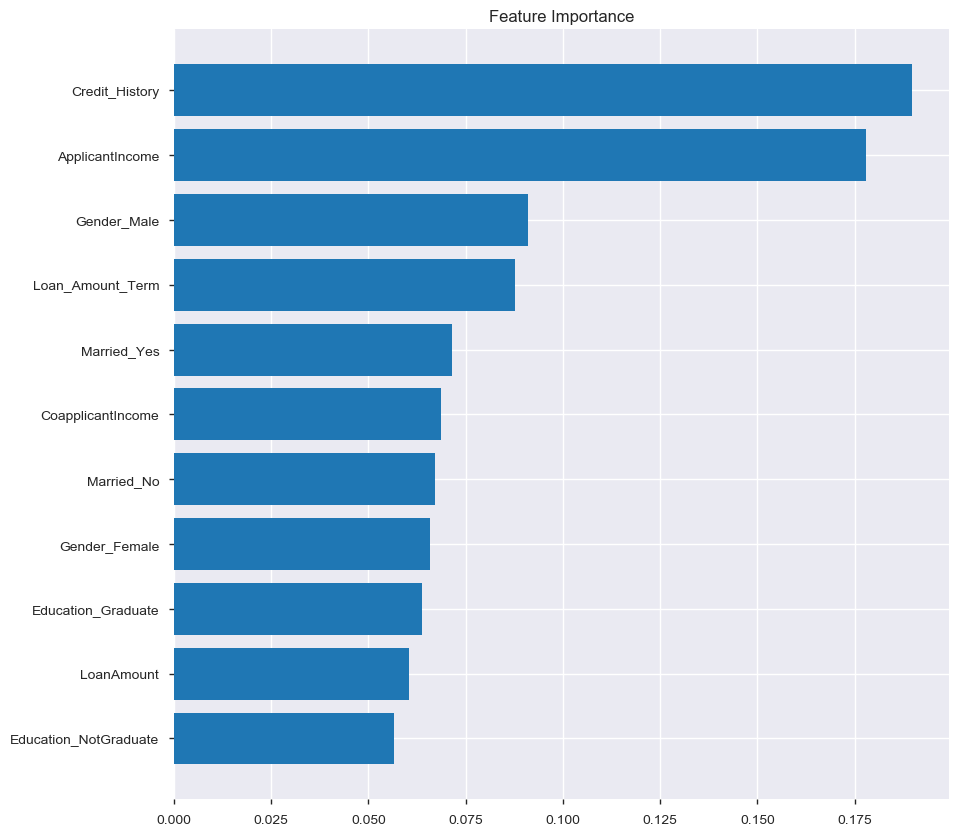

In [157]:
#Calculating feature importances
importances = model.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [lp_train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X_train.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X_train.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')
